#1. Mount Google Drive

refrence  
https://stackoverflow.com/questions/69822304/google-colab-google-drive-can%C2%B4t-be-mounted-anymore-browser-popup-google-dri

In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

/content
mkdir: cannot create directory ‘drive’: File exists
/content/drive
mkdir: cannot create directory ‘MyDrive’: File exists
/content
/
Access token retrieved correctly.


# 2. File Listing and Data Preprocessing

In [ ]:
import os
import io
import zipfile
from zipfile import ZipFile
import pandas as pd
import requests
import tensorflow as tf

In [ ]:
os.mkdir("/content/data")

os.mkdir("/content/data/test")
os.mkdir("/content/data/train")
os.mkdir("/content/data/valid")

os.mkdir("/content/data/test/images")
os.mkdir("/content/data/test/labels")
os.mkdir("/content/data/train/images")
os.mkdir("/content/data/train/labels")
os.mkdir("/content/data/valid/images")
os.mkdir("/content/data/valid/labels")

FileExistsError: ignored

In [ ]:
import zipfile
from glob import glob

ZipDirectoryList:list = [
    # Train
    # Labled
    '/content/drive/MyDrive/data/143.패션상품 및 착용 영상/01.데이터/1.Training/라벨링데이터_230515_add/2021_Fashion_train_labels_v230428.zip',
    # Images
    '/content/drive/MyDrive/data/143.패션상품 및 착용 영상/01.데이터/1.Training/원천데이터_230515_add/2021_Fashion_train_itemimages_v230428.zip',
    '/content/drive/MyDrive/data/143.패션상품 및 착용 영상/01.데이터/1.Training/원천데이터_230515_add/2021_Fashion_train_modelimages_v230428.zip',

    # Valid
    # Labled
    '/content/drive/MyDrive/data/143.패션상품 및 착용 영상/01.데이터/2.Validation/라벨링데이터_230515_add/2021_Fashion_val_labels_v230428.zip',
    # Images
    '/content/drive/MyDrive/data/143.패션상품 및 착용 영상/01.데이터/2.Validation/원천데이터_230515_add/2021_Fashion_val_images_v230428.zip'
]

In [ ]:
os.mkdir('/content/drive_unzip')

os.mkdir('/content/drive_unzip/0')
os.mkdir('/content/drive_unzip/1')
os.mkdir('/content/drive_unzip/2')
os.mkdir('/content/drive_unzip/3')
os.mkdir('/content/drive_unzip/4')

In [ ]:
%cd /content/drive_unzip/0
zipfile.ZipFile(ZipDirectoryList[0]).extractall()

%cd /content/drive_unzip/1
zipfile.ZipFile(ZipDirectoryList[1]).extractall()

#%cd /content/drive_unzip/2
#zipfile.ZipFile(ZipDirectoryList[2]).extractall()

%cd /content/drive_unzip/3
zipfile.ZipFile(ZipDirectoryList[3]).extractall()

%cd /content/drive_unzip/4
zipfile.ZipFile(ZipDirectoryList[4]).extractall()

/content/drive_unzip/0
/content/drive_unzip/1
/content/drive_unzip/3
/content/drive_unzip/4


In [ ]:
%cd /content

/content


In [70]:
import json

json_Item = os.listdir('/content/drive_unzip/0/Item-Pose')
'/content/drive_unzip/0/Item-Parse/' + json_Item[0]

'/content/drive_unzip/0/Item-Parse/1125508_F.json'

In [75]:

import json

with open('/content/drive_unzip/0/Item-Parse/1008004_B.json', "r") as st_json:

    st_python = json.load(st_json)
st_python


{'file_name': '1008004_B.jpg',
 'region1': {'category_id': 4,
  'view_point': 1,
  'product_type': 'torso',
  'segmentation': [[[229.1338174273859, 600.4745850622404],
    [227.49999999999997, 620.6249999999999],
    [219.99999999999997, 641.2499999999999],
    [214.37499999999997, 667.4999999999999],
    [213.74999999999997, 691.8749999999999],
    [218.12499999999997, 711.2499999999999],
    [218.74999999999997, 743.7499999999999],
    [227.49999999999997, 767.4999999999999],
    [233.74999999999997, 784.3749999999999],
    [237.51543209876547, 805.8917548500881],
    [246.24999999999994, 803.1249999999999],
    [261.87499999999994, 801.2499999999999],
    [264.57841483979763, 801.9614249578411],
    [314.99999999999994, 798.1249999999999],
    [324.99999999999994, 798.1249999999999],
    [346.24999999999994, 794.9999999999999],
    [371.24999999999994, 794.3749999999999],
    [405.62499999999994, 794.9999999999999],
    [416.2452290076338, 797.2757633587786],
    [431.87499999999994

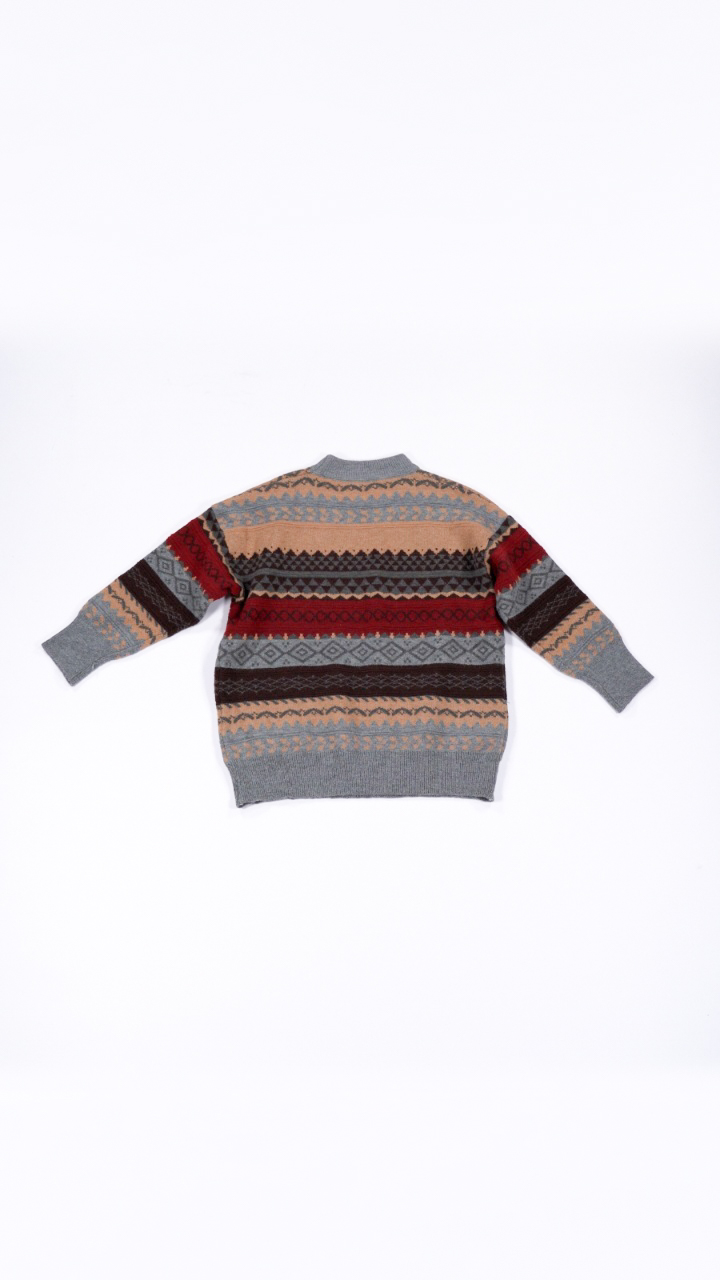

In [73]:
from PIL import Image
img  = Image.open('/content/drive_unzip/1/Item-Image/1008004_B.jpg')
img